## NEWS MOOOD

In [15]:
#  Dependencies

import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config2 import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Set up Twitter api keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [5]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [61]:
target_terms = ['@BBCWorld', '@CBSNews', '@CNN', '@FOXTV', '@nytimes']
results_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
    

In [62]:
# loop through tweets and grab the text

for news in target_terms:
    oldest_tweet = None
    
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    for i in range(10):
        public_tweets = api.user_timeline(news, count=10, result_type='recent', max_id=oldest_tweet)
        
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
           
            compound_list.append(compound)
           
            
            oldest_tweet = tweet["id"] - 1
            
    sentiment = {
    "User": news,
    "Compound": compound_list,
    }
    results_list.append(sentiment)

In [70]:
bbc = results_list[0]
cbs = results_list[1]
cnn = results_list[2]
fox = results_list[3]
nytimes = results_list[4]

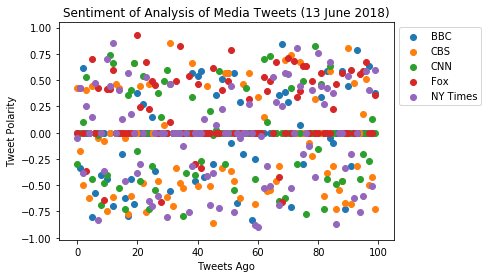

In [85]:
plt.scatter(range(len(bbc['Compound'])), bbc['Compound'], label='BBC')
plt.scatter(range(len(cbs['Compound'])), cbs['Compound'], label='CBS')
plt.scatter(range(len(cnn['Compound'])), cnn['Compound'], label='CNN')
plt.scatter(range(len(fox['Compound'])), fox['Compound'], label='Fox')
plt.scatter(range(len(nytimes['Compound'])), nytimes['Compound'], label='NY Times')
plt.title('Sentiment of Analysis of Media Tweets (13 June 2018)')
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1))
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.savefig('sentiment_analysis_scatter.png', bbox_inches='tight')


In [107]:
height = np.mean(bbc['Compound']), np.mean(cbs['Compound']), np.mean(cnn['Compound']), \
np.mean(fox['Compound']), np.mean(nytimes['Compound'])
print(height)
color = ['blue', 'orange', 'green', 'red', 'purple']

(-0.017338, -0.083654, -0.023412, 0.18259899999999998, -0.031265)


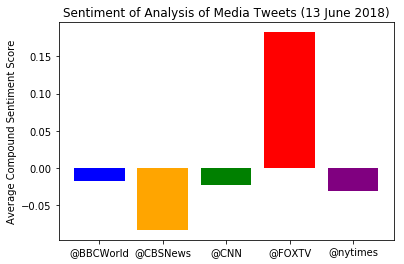

In [111]:
plt.bar(range(len(height)), height, tick_label = target_terms, color=color)
plt.title('Sentiment of Analysis of Media Tweets (13 June 2018)')
plt.ylabel('Average Compound Sentiment Score')
plt.savefig('sentiment_analysis_bar.png', bbox_inches='tight')
